In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# CODE FROM JUAN:
def neighbors(data, k=20):
    # for a given dataset, finds the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree',n_jobs =-1).fit(data)
    distances, indices = nbrs.kneighbors()
    return indices

def jaccard(A,B):
    # for two sets A and B, finds the Jaccard distance J between A and B
    A = set(A)
    B = set(B)
    union = list(A|B)
    intersection = list(A & B)
    J = ((len(union) - len(intersection))/(len(union)))
    return(J)

def get_AJD(A,B, num_neigh=20):
    NA= neighbors(A,k=num_neigh)
    NB = neighbors(B,k=num_neigh)
    #num_neigh=NA.shape[1]
    total_JD=0
    for i in range(NA.shape[0]):
        total_JD+= jaccard(NA[i,:],NB[i,:])
    total_JD/= NA.shape[0]
    return total_JD

# ALSO SEE https://github.com/shamusc/ajd?tab=readme-ov-file

def reduce_PCA(df, n_components):
    pca = PCA(n_components=n_components)
    columns = ['PC' + str(i) for i in range(1,n_components+1)]
    df_reduced = pca.fit_transform(df)
    df_reduced = pd.DataFrame(df_reduced, columns=columns)
    return df_reduced

def reduce_tSNE(df, n_components):
	tsne = TSNE(n_components=n_components, random_state = 10)
	columns = ['Dim' + str(i) for i in range(1,n_components+1)]
	df_reduced = tsne.fit_transform(df)
	df_reduced = pd.DataFrame(df_reduced, columns=columns)
	return df_reduced

def scree_plot(df):
    pca = PCA()
    pca.fit(df)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()
    print(pca.explained_variance_ratio_)

def load_data_expression(path):
    df = pd.read_csv(path, sep='\t')
    return df

def load_data_coords(path):
    df = pd.read_csv(path, sep='\t')
    return df

In [14]:
expression_df = load_data_expression(r'./Individual3_RAA_R1.newcount')
coords_df = load_data_coords(r'./Individual3_RAA_R1.idx')

In [15]:
expression_df

,ensemblid,gene,spot1,spot2,spot3,spot4,spot5,spot6,spot7,spot8,...,spot525,spot526,spot527,spot528,spot529,spot530,spot531,spot532,spot533,spot534
0,ENSG00000000419,DPM1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,ENSG00000000971,CFH,0.000000,1.973604,0.000000,0.986271,0.0,0.0,0.0,3.931867,...,0.0,0.986271,0.0,1.975388,1.971044,0.989367,0.986271,0.0,0.000000,0.0
2,ENSG00000001036,FUCA2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,ENSG00000001084,GCLC,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,ENSG00000001461,NIPAL3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,ENSG00000278845,MRPL45,0.988834,0.986802,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8548,ENSG00000279115,AC006386.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8549,ENSG00000279457,WASH9P,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8550,ENSG00000279483,AC090498.1,0.988834,1.973604,1.973604,0.986271,0.0,0.0,0.0,0.982967,...,0.0,0.986271,0.0,0.000000,0.985522,0.989367,1.972541,0.0,0.991405,0.0


In [16]:
coords_df

,coordinate,spot1,spot2,spot3,spot4,spot5,spot6,spot7,spot8,spot9,...,spot525,spot526,spot527,spot528,spot529,spot530,spot531,spot532,spot533,spot534
0,x,6,6,6,6,6,6,6,7,7,...,31,32,32,32,32,32,32,32,32,32
1,y,7,8,9,10,11,12,13,5,6,...,15,4,5,9,10,11,12,13,14,15


In [17]:
processed_df = expression_df.drop(columns=['ensemblid', 'gene'], inplace=False)
processed_df = processed_df.T

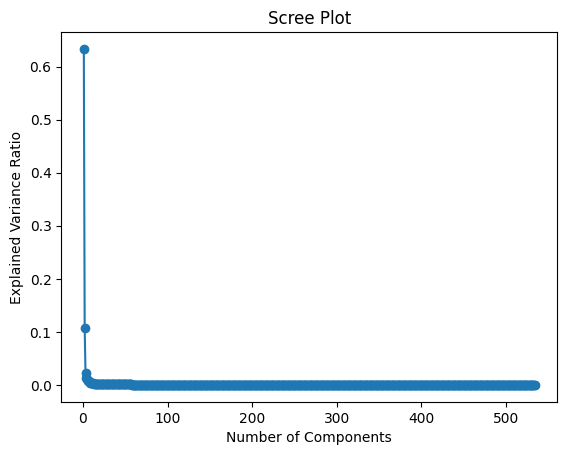

[6.33377132e-01 1.06937904e-01 2.21126014e-02 1.35019380e-02
 1.06364070e-02 7.63229340e-03 6.66185996e-03 4.54998784e-03
 3.64357703e-03 3.14614983e-03 2.95659647e-03 2.74185620e-03
 2.61448813e-03 2.43850222e-03 2.28463376e-03 2.18364279e-03
 2.05768206e-03 1.95731240e-03 1.93617892e-03 1.92206011e-03
 1.63265480e-03 1.58669354e-03 1.50887183e-03 1.48078347e-03
 1.42380817e-03 1.39231692e-03 1.30937620e-03 1.29224468e-03
 1.24503328e-03 1.23340917e-03 1.18813996e-03 1.15683984e-03
 1.12210136e-03 1.11060525e-03 1.08693646e-03 1.07959655e-03
 1.05491534e-03 1.02936852e-03 1.02271043e-03 1.00801295e-03
 9.89084418e-04 9.68101140e-04 9.57237320e-04 9.33842188e-04
 9.28399082e-04 9.26687751e-04 9.01401600e-04 8.95654927e-04
 8.81883905e-04 8.76188225e-04 8.58056777e-04 8.54225688e-04
 8.41237010e-04 8.37462193e-04 8.24943073e-04 8.08015173e-04
 8.04512327e-04 7.85945876e-04 7.79104622e-04 7.69659593e-04
 7.63781581e-04 7.58542691e-04 7.50611141e-04 7.40922072e-04
 7.34537804e-04 7.256408

In [18]:
scree_plot(processed_df)

In [25]:
# PCA
# initially chose to reduce to 5 dimensions based on Scree plot
# update: to keep consistent between techniques, we choose to reduce to 2 dimensions
df_PCA = reduce_PCA(processed_df, 2)
df_PCA

,PC1,PC2
0,74.879692,-35.938822
1,79.358610,-20.553925
2,54.012481,-35.912672
3,110.320036,-52.378852
4,30.962225,-37.067352
...,...,...
529,18.110542,-29.719539
530,25.340521,-38.105961
531,2.649939,-43.308587
532,-9.071842,-43.771132


<Axes: xlabel='PC1', ylabel='PC2'>

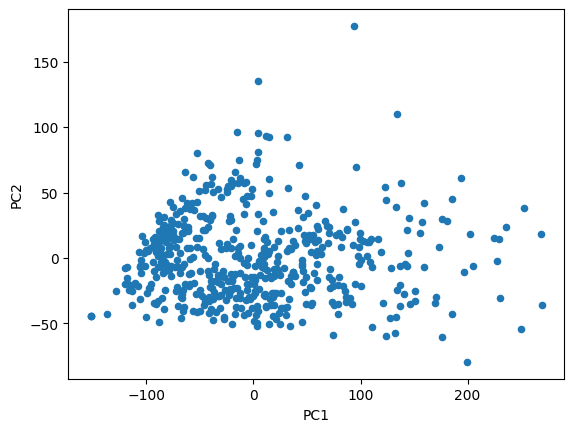

In [20]:
df_PCA.plot.scatter("PC1", "PC2")

In [21]:
# t-SNE
df_tSNE = reduce_tSNE(processed_df, 2)
df_tSNE

,Dim1,Dim2
0,22.577278,-2.386423
1,22.772844,-1.389311
2,17.052528,-3.022690
3,26.723597,-4.238754
4,12.831623,-1.999643
...,...,...
529,10.434475,-3.028093
530,11.259299,-4.253544
531,6.704328,-3.471591
532,7.063404,-0.672685


<Axes: xlabel='Dim1', ylabel='Dim2'>

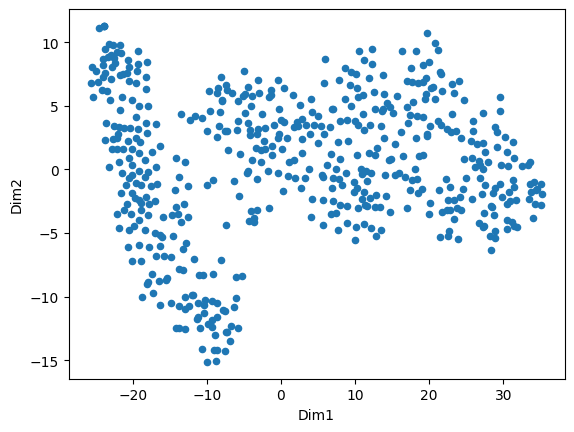

In [22]:
df_tSNE.plot.scatter("Dim1", "Dim2")

In [23]:
# pca knn + AJD analysis
pca_ajd_arr = []
for i in range(1, len(processed_df)):
  pca_neighbors = neighbors(df_PCA, i)
  raw_neighbors = neighbors(processed_df, i)
  pca_ajd_arr.append(get_AJD(pca_neighbors, raw_neighbors, i))

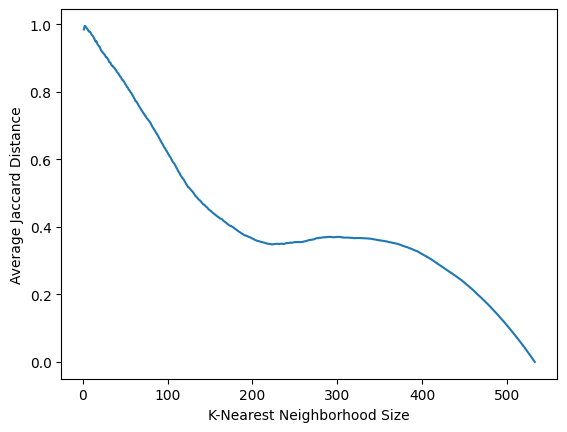

In [24]:
plt.plot(range(1, len(processed_df)), pca_ajd_arr)
plt.xlabel("K-Nearest Neighborhood Size")
plt.ylabel("Average Jaccard Distance")
plt.show()